In [2]:
import json
import pandas as pd

In [5]:
# Load the JSON file
file_path = 'stats.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the data into a DataFrame
df = pd.json_normalize(data)

# Display the DataFrame
df

,count,sum,sum_squared,min,max,mean,variance,stddev,name.name,name.split,name.perturbation.name,name.perturbation.robustness,name.perturbation.fairness,name.perturbation.computed_on
0,1,4.000,16.000000,4.000,4.000,4.000,0.0,0.0,num_references,test,NaN,NaN,NaN,NaN
1,1,1.000,1.000000,1.000,1.000,1.000,0.0,0.0,num_train_trials,test,NaN,NaN,NaN,NaN
2,1,248.508,61756.226064,248.508,248.508,248.508,0.0,0.0,num_prompt_tokens,test,NaN,NaN,NaN,NaN
3,1,0.000,0.000000,0.000,0.000,0.000,0.0,0.0,num_completion_tokens,test,NaN,NaN,NaN,NaN
4,1,0.000,0.000000,0.000,0.000,0.000,0.0,0.0,num_output_tokens,test,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,0.000,0.000000,0.000,0.000,0.000,0.0,0.0,num_perplexity_tokens,test,robustness,True,False,worst
74,1,0.000,0.000000,0.000,0.000,0.000,0.0,0.0,num_perplexity_tokens,test,fairness,False,True,worst
75,1,0.000,0.000000,0.000,0.000,0.000,0.0,0.0,num_bytes,test,robustness,True,False,worst
76,1,0.000,0.000000,0.000,0.000,0.000,0.0,0.0,num_bytes,test,fairness,False,True,worst


In [6]:
df['name.name'].unique()

array(['num_references', 'num_train_trials', 'num_prompt_tokens',
       'num_completion_tokens', 'num_output_tokens', 'training_co2_cost',
       'training_energy_cost', 'inference_runtime', 'batch_size',
       'finish_reason_length', 'finish_reason_stop',
       'finish_reason_endoftext', 'finish_reason_unknown',
       'num_train_instances', 'prompt_truncated', 'max_prob',
       'exact_match', 'exact_match@5', 'quasi_exact_match',
       'quasi_exact_match@5', 'prefix_exact_match',
       'prefix_exact_match@5', 'quasi_prefix_exact_match',
       'quasi_prefix_exact_match@5', 'logprob', 'num_perplexity_tokens',
       'num_bytes', 'num_instances'], dtype=object)

In [41]:
for i in df.columns[8:]:
    print(f'{i} : {df[i].unique()}')

name.name : ['num_references' 'num_train_trials' 'num_prompt_tokens'
 'num_completion_tokens' 'num_output_tokens' 'training_co2_cost'
 'training_energy_cost' 'inference_runtime' 'batch_size'
 'finish_reason_length' 'finish_reason_stop' 'finish_reason_endoftext'
 'finish_reason_unknown' 'num_train_instances' 'prompt_truncated'
 'max_prob' 'exact_match' 'exact_match@5' 'quasi_exact_match'
 'quasi_exact_match@5' 'prefix_exact_match' 'prefix_exact_match@5'
 'quasi_prefix_exact_match' 'quasi_prefix_exact_match@5' 'logprob'
 'num_perplexity_tokens' 'num_bytes' 'num_instances']
name.split : ['test']
name.perturbation.name : [nan 'robustness' 'fairness']
name.perturbation.robustness : [nan True False]
name.perturbation.fairness : [nan False True]
name.perturbation.computed_on : [nan 'worst']


In [36]:
df.columns

Index(['count', 'sum', 'sum_squared', 'min', 'max', 'mean', 'variance',
       'stddev', 'name.name', 'name.split', 'name.perturbation.name',
       'name.perturbation.robustness', 'name.perturbation.fairness',
       'name.perturbation.computed_on'],
      dtype='object')

In [12]:
df.info

<bound method DataFrame.info of     count      sum    sum_squared      min      max     mean  variance  \
0       1    4.000      16.000000    4.000    4.000    4.000       0.0   
1       1    1.000       1.000000    1.000    1.000    1.000       0.0   
2       1  248.508   61756.226064  248.508  248.508  248.508       0.0   
3       1    0.000       0.000000    0.000    0.000    0.000       0.0   
4       1    0.000       0.000000    0.000    0.000    0.000       0.0   
..    ...      ...            ...      ...      ...      ...       ...   
73      1    0.000       0.000000    0.000    0.000    0.000       0.0   
74      1    0.000       0.000000    0.000    0.000    0.000       0.0   
75      1    0.000       0.000000    0.000    0.000    0.000       0.0   
76      1    0.000       0.000000    0.000    0.000    0.000       0.0   
77      1  500.000  250000.000000  500.000  500.000  500.000       0.0   

    stddev              name.name name.split name.perturbation.name  \
0      0

In [14]:
df.describe()

,count,sum,sum_squared,min,max,mean,variance,stddev
count,78.000000,78.000000,78.000000,76.000000,76.000000,76.000000,76.0,76.0
mean,0.974359,16.773175,5582.373184,17.214575,17.214575,17.214575,0.0,0.0
std,0.159085,73.279454,30474.769551,74.198216,74.198216,74.198216,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.928000,0.861184,0.928000,0.928000,0.928000,0.0,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
max,1.000000,500.000000,250000.000000,500.000000,500.000000,500.000000,0.0,0.0


In [44]:
# Load the JSON file
file_path2 = 'scores_v1.5.json'
with open(file_path2, 'r') as file:
    data2 = json.load(file)

# Convert the data into a DataFrame
df2 = pd.json_normalize(data2)

# Display the DataFrame
df2

,model,tests
0,01-ai_yi-large-preview,"[{'test_name': 'commonsense', 'metric': 'exact..."
1,anthropic_claude-3-5-sonnet-20240620,"[{'test_name': 'commonsense', 'metric': 'exact..."
2,google_gemini-1.0-pro-002,"[{'test_name': 'commonsense', 'metric': 'exact..."
3,google_gemini-1.5-flash-001,"[{'test_name': 'commonsense', 'metric': 'exact..."
4,google_gemini-1.5-pro-001,"[{'test_name': 'commonsense', 'metric': 'exact..."


In [47]:
df2.columns

Index(['model', 'tests'], dtype='object')

In [46]:
df2['tests'][0]

[{'test_name': 'commonsense',
  'metric': 'exact_match',
  'subsets': [{'score': 0.946}]},
 {'test_name': 'gsm',
  'metric': 'final_number_exact_match',
  'subsets': [{'score': 0.69}]},
 {'test_name': 'legalbench',
  'metric': 'quasi_exact_match',
  'subsets': [{'score': 0.7368421052631579, 'subset': 'abercrombie'},
   {'score': 0.14489795918367346, 'subset': 'corporate_lobbying'},
   {'score': 0.23705722070844687, 'subset': 'function_of_decision_section'},
   {'score': 0.591, 'subset': 'international_citizenship_questions'},
   {'score': 0.8842105263157894, 'subset': 'proa'}]},
 {'test_name': 'math',
  'metric': 'math_equiv_chain_of_thought',
  'subsets': [{'score': 0.8740740740740741, 'subject': 'algebra'},
   {'score': 0.7692307692307693, 'subject': 'counting_and_probability'},
   {'score': 0.5526315789473685, 'subject': 'geometry'},
   {'score': 0.5576923076923077, 'subject': 'intermediate_algebra'},
   {'score': 0.8, 'subject': 'number_theory'},
   {'score': 0.7790697674418605, 's

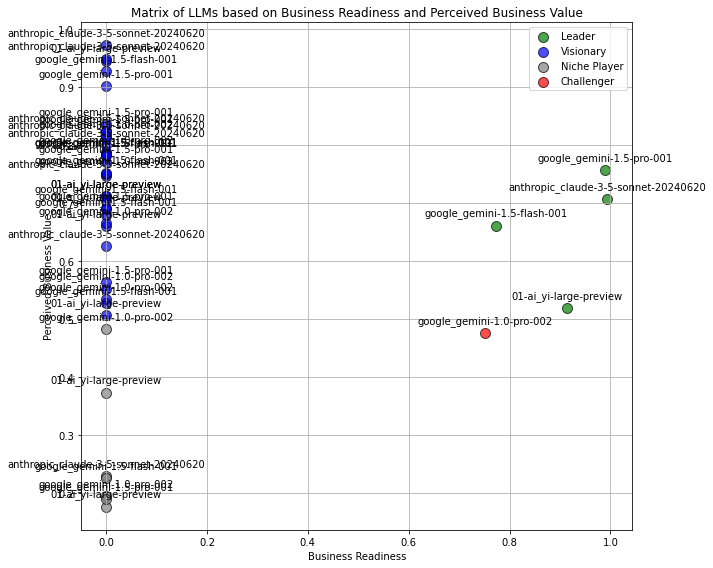

In [50]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
file_path = 'scores_v1.5.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Normalize the JSON into a DataFrame
df = pd.json_normalize(data, record_path=['tests'], meta=['model'])

# Define functions to extract scores based on criteria
def extract_business_readiness(row):
    criteria_scores = {
        'credibility': 0,
        'harmfulness': 0,
        'accuracy': 0,
        'benchmark_performance': 0
    }
    for subset in row['subsets']:
        if 'score' in subset:
            if subset.get('subset') == 'abercrombie':
                criteria_scores['credibility'] = subset['score']
            elif subset.get('subset') == 'corporate_lobbying':
                criteria_scores['harmfulness'] = subset['score']
            elif subset.get('subset') == 'function_of_decision_section':
                criteria_scores['accuracy'] = subset['score']
            elif subset.get('subset') == 'international_citizenship_questions':
                criteria_scores['benchmark_performance'] = subset['score']
            elif subset.get('subset') == 'proa':
                criteria_scores['credibility'] += subset['score'] * 0.2  # Weighted average for proa
    return pd.Series(criteria_scores)

# Apply the function to extract scores
df[['credibility', 'harmfulness', 'accuracy', 'benchmark_performance']] = df.apply(extract_business_readiness, axis=1)

# Define function to extract perceived business value (PBV) score (for example, average of all subsets)
def extract_perceived_business_value(row):
    pbv_score = sum([subset['score'] for subset in row['subsets'] if 'score' in subset]) / len(row['subsets'])
    return pbv_score

# Apply the function to extract PBV score
df['Perceived Business Value'] = df.apply(extract_perceived_business_value, axis=1)

# Function to categorize quadrants
def categorize_quadrant(br_score, pbv_score, br_threshold, pbv_threshold):
    if br_score >= br_threshold and pbv_score >= pbv_threshold:
        return 'Leader'
    elif br_score < br_threshold and pbv_score >= pbv_threshold:
        return 'Visionary'
    elif br_score < br_threshold and pbv_score < pbv_threshold:
        return 'Niche Player'
    else:
        return 'Challenger'

# Define thresholds for categorization (you can adjust these as needed)
br_threshold = 0.6
pbv_threshold = 0.5

# Apply categorization to each row in the DataFrame
df['Quadrant'] = df.apply(lambda row: categorize_quadrant(row['credibility'], row['Perceived Business Value'], br_threshold, pbv_threshold), axis=1)

# Define colors for each quadrant
colors = {'Leader': 'green', 'Visionary': 'blue', 'Niche Player': 'gray', 'Challenger': 'red'}

# Plotting
plt.figure(figsize=(10, 8))
for quadrant, color in colors.items():
    plt.scatter(df[df['Quadrant'] == quadrant]['credibility'], df[df['Quadrant'] == quadrant]['Perceived Business Value'], 
                color=color, label=quadrant, alpha=0.7, s=100, edgecolor='k')  # Black edgecolor for points

# Annotate each point with LLM model name
for index, row in df.iterrows():
    plt.annotate(row['model'], (row['credibility'], row['Perceived Business Value']), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
plt.xlabel('Business Readiness')
plt.ylabel('Perceived Business Value')
plt.title('Matrix of LLMs based on Business Readiness and Perceived Business Value')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


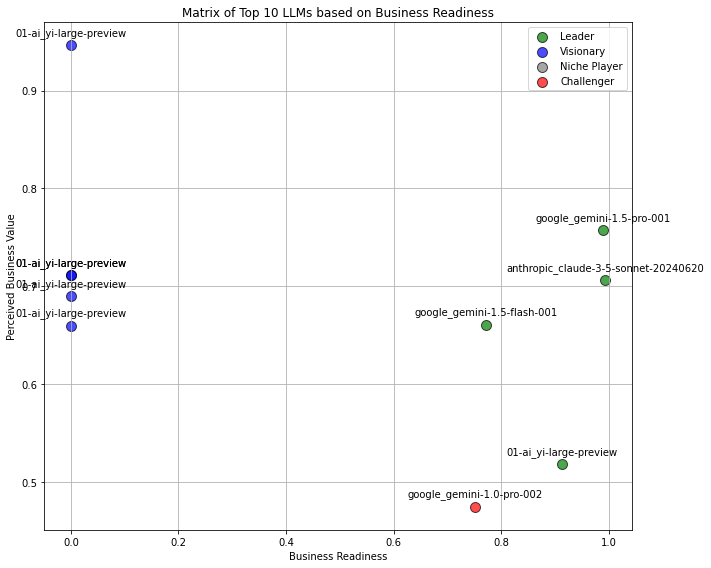

In [51]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
file_path = 'scores_v1.5.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Normalize the JSON into a DataFrame
df = pd.json_normalize(data, record_path=['tests'], meta=['model'])

# Define functions to extract scores based on criteria
def extract_business_readiness(row):
    criteria_scores = {
        'credibility': 0,
        'harmfulness': 0,
        'accuracy': 0,
        'benchmark_performance': 0
    }
    for subset in row['subsets']:
        if 'score' in subset:
            if subset.get('subset') == 'abercrombie':
                criteria_scores['credibility'] = subset['score']
            elif subset.get('subset') == 'corporate_lobbying':
                criteria_scores['harmfulness'] = subset['score']
            elif subset.get('subset') == 'function_of_decision_section':
                criteria_scores['accuracy'] = subset['score']
            elif subset.get('subset') == 'international_citizenship_questions':
                criteria_scores['benchmark_performance'] = subset['score']
            elif subset.get('subset') == 'proa':
                criteria_scores['credibility'] += subset['score'] * 0.2  # Weighted average for proa
    return pd.Series(criteria_scores)

# Apply the function to extract scores
df[['credibility', 'harmfulness', 'accuracy', 'benchmark_performance']] = df.apply(extract_business_readiness, axis=1)

# Define function to extract perceived business value (PBV) score (for example, average of all subsets)
def extract_perceived_business_value(row):
    pbv_score = sum([subset['score'] for subset in row['subsets'] if 'score' in subset]) / len(row['subsets'])
    return pbv_score

# Apply the function to extract PBV score
df['Perceived Business Value'] = df.apply(extract_perceived_business_value, axis=1)

# Function to categorize quadrants
def categorize_quadrant(br_score, pbv_score, br_threshold, pbv_threshold):
    if br_score >= br_threshold and pbv_score >= pbv_threshold:
        return 'Leader'
    elif br_score < br_threshold and pbv_score >= pbv_threshold:
        return 'Visionary'
    elif br_score < br_threshold and pbv_score < pbv_threshold:
        return 'Niche Player'
    else:
        return 'Challenger'

# Define thresholds for categorization (you can adjust these as needed)
br_threshold = 0.6
pbv_threshold = 0.5

# Apply categorization to each row in the DataFrame
df['Quadrant'] = df.apply(lambda row: categorize_quadrant(row['credibility'], row['Perceived Business Value'], br_threshold, pbv_threshold), axis=1)

# Define colors for each quadrant
colors = {'Leader': 'green', 'Visionary': 'blue', 'Niche Player': 'gray', 'Challenger': 'red'}

# Filter top 10 LLMs based on Business Readiness
top_10_br_df = df.nlargest(10, 'credibility')

# Filter top 10 LLMs based on Perceived Business Value
top_10_pbv_df = df.nlargest(10, 'Perceived Business Value')

# Plotting
plt.figure(figsize=(10, 8))
for quadrant, color in colors.items():
    plt.scatter(top_10_br_df[top_10_br_df['Quadrant'] == quadrant]['credibility'], 
                top_10_br_df[top_10_br_df['Quadrant'] == quadrant]['Perceived Business Value'], 
                color=color, label=quadrant, alpha=0.7, s=100, edgecolor='k')  # Black edgecolor for points

# Annotate each point with LLM model name
for index, row in top_10_br_df.iterrows():
    plt.annotate(row['model'], (row['credibility'], row['Perceived Business Value']), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
plt.xlabel('Business Readiness')
plt.ylabel('Perceived Business Value')
plt.title('Matrix of Top 10 LLMs based on Business Readiness')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


- **Loading Data**: The code starts by loading a JSON file (scores_v1.5.json) that contains scores for various Language Models (LLMs).

- **Normalization**: The JSON data is then normalized into a Pandas DataFrame (df). Each row represents a different test for a specific LLM, and each test has its own scores and metrics.

- **Criteria and Scores**: A function (extract_business_readiness) is defined to extract scores for different criteria such as credibility, harmfulness, accuracy, and benchmark performance from the subsets of each LLM test.

- **Weighted Average**: Some scores are combined or weighted (e.g., proa subset) to better reflect the overall performance of the LLM.

- **Quadrant Categorization**: The categorize_quadrant function assigns each LLM to one of four quadrants based on its scores for Business Readiness (br_score) and Perceived Business Value (pbv_score).

- **Thresholds**: Threshold values (br_threshold and pbv_threshold) determine the boundaries between quadrants. These thresholds can be adjusted depending on specific criteria or preferences.

    <u><b>Quadrant Definitions</b></u> :
- Leader: High Business Readiness and high Perceived Business Value. (green)
- Visionary: Low Business Readiness and high Perceived Business Value. (blue)
- Niche Player: Low Business Readiness and low Perceived Business Value. (grey)
- Challenger: Any other combinations not falling into the above categories. (challenger)

    <u><b>Matrix Guidelines and Interpretation</b></u>

**Matrix Type**: The plot follows a matrix similar to Gartner's Magic Quadrant, where the axes represent:

**Horizontal Axis (Business Readiness)**: Quantitative assessment of an LLM's readiness in terms of credibility, harmfulness, accuracy, and benchmark performance.

**Vertical Axis (Perceived Business Value)**: Qualitative assessment of an LLM's perceived value based on capabilities, success stories, and popularity.

**Categorization**: LLMs are categorized into quadrants (Leader, Visionary, Niche Player, Challenger) based on their scores relative to defined thresholds for Business Readiness and Perceived Business Value.

**Usage of Scores**: Scores extracted from various subsets (tests) of each LLM provide a quantitative basis for categorization. For example, credibility scores reflect the trustworthiness and reputation of an LLM, while accuracy scores indicate its precision in generating correct outputs.

**Interpretation**: The matrix allows stakeholders to visually assess and compare LLMs based on their readiness and perceived value, aiding decision-making processes such as adoption, investment, or strategic partnerships.